In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
airquality = 'dataset/airquality.csv'
airquality_data = pd.read_csv(airquality)
print(airquality_data.head())

      tanggal             stasiun  pm10  so2    co    o3   no2   max critical  \
0  2010-01-01  DKI1 (Bunderan HI)  60.0  4.0  73.0  27.0  14.0  73.0       CO   
1  2010-01-02  DKI1 (Bunderan HI)  32.0  2.0  16.0  33.0   9.0  33.0       O3   
2  2010-01-03  DKI1 (Bunderan HI)  27.0  2.0  19.0  20.0   9.0  27.0     PM10   
3  2010-01-04  DKI1 (Bunderan HI)  22.0  2.0  16.0  15.0   6.0  22.0     PM10   
4  2010-01-05  DKI1 (Bunderan HI)  25.0  2.0  17.0  15.0   8.0  25.0     PM10   

  categori  pm25  
0   SEDANG   NaN  
1     BAIK   NaN  
2     BAIK   NaN  
3     BAIK   NaN  
4     BAIK   NaN  


In [4]:
airquality_data = airquality_data.drop(columns=['pm25'])

In [5]:
translations = {
    'tanggal': 'date',
    'stasiun': 'station',
    'pm10': 'PM10',
    'so2': 'SO2',
    'co': 'CO',
    'o3': 'O3',
    'no2': 'NO2',
    'max': 'max_value',
    'critical': 'critical_pollutant',
    'categori': 'category',
}
airquality_data.rename(columns=translations, inplace=True)
airquality_data

,date,station,PM10,SO2,CO,O3,NO2,max_value,critical_pollutant,category
0,2010-01-01,DKI1 (Bunderan HI),60.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,2.0,17.0,15.0,8.0,25.0,PM10,BAIK
...,...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,DKI1 (Bunderan HI),52.0,61.0,15.0,20.0,15.0,71.0,PM25,SEDANG
4379,2021-12-28,DKI1 (Bunderan HI),51.0,53.0,15.0,18.0,13.0,65.0,PM25,SEDANG
4380,2021-12-29,DKI1 (Bunderan HI),31.0,54.0,10.0,24.0,11.0,54.0,SO2,SEDANG
4381,2021-12-30,DKI1 (Bunderan HI),55.0,53.0,16.0,23.0,14.0,71.0,PM25,SEDANG


In [6]:
for column in ['PM10', 'SO2', 'CO', 'O3', 'NO2']:
    airquality_data[column] = airquality_data[column].fillna(airquality_data[column].mean())

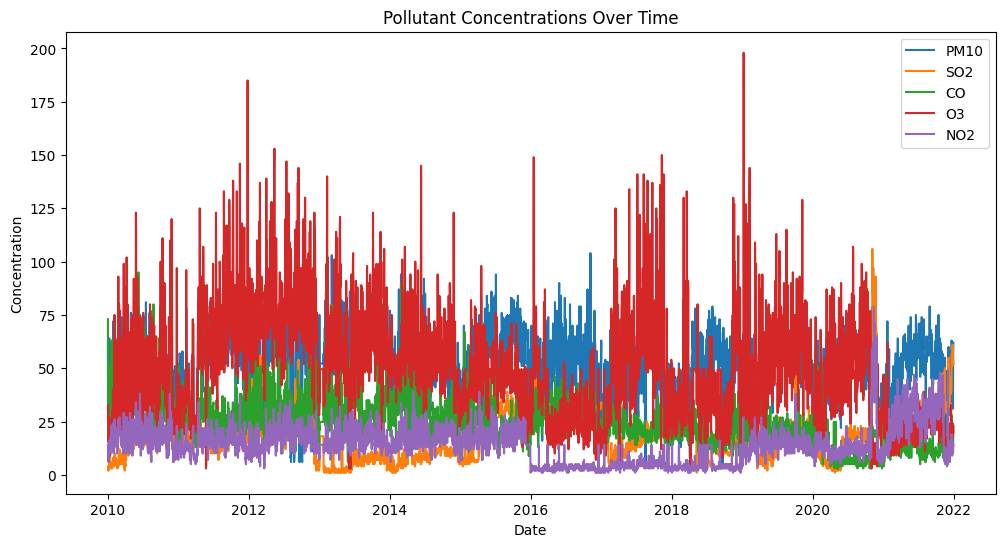

In [7]:
airquality_data['date'] = pd.to_datetime(airquality_data['date'])
plt.figure(figsize=(12, 6))
plt.plot(airquality_data['date'], airquality_data['PM10'], label='PM10')
plt.plot(airquality_data['date'], airquality_data['SO2'], label='SO2')
plt.plot(airquality_data['date'], airquality_data['CO'], label='CO')
plt.plot(airquality_data['date'], airquality_data['O3'], label='O3')
plt.plot(airquality_data['date'], airquality_data['NO2'], label='NO2')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.title('Pollutant Concentrations Over Time')
plt.legend()
plt.show()

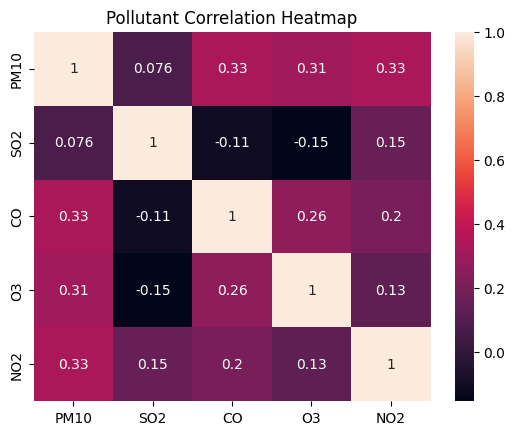

In [8]:
correlation_matrix = airquality_data[['PM10', 'SO2', 'CO', 'O3', 'NO2']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Pollutant Correlation Heatmap')
plt.show()